C:\Users\tanuj\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars


Best epsilon found using cross-validation: 8.999852631901395e-05
Best F1 on Cross Validation Set: 0.8750000000000001
(you should see a value epsilon of about 8.99e-05)
(you should see a Best F1 value of  0.875000)



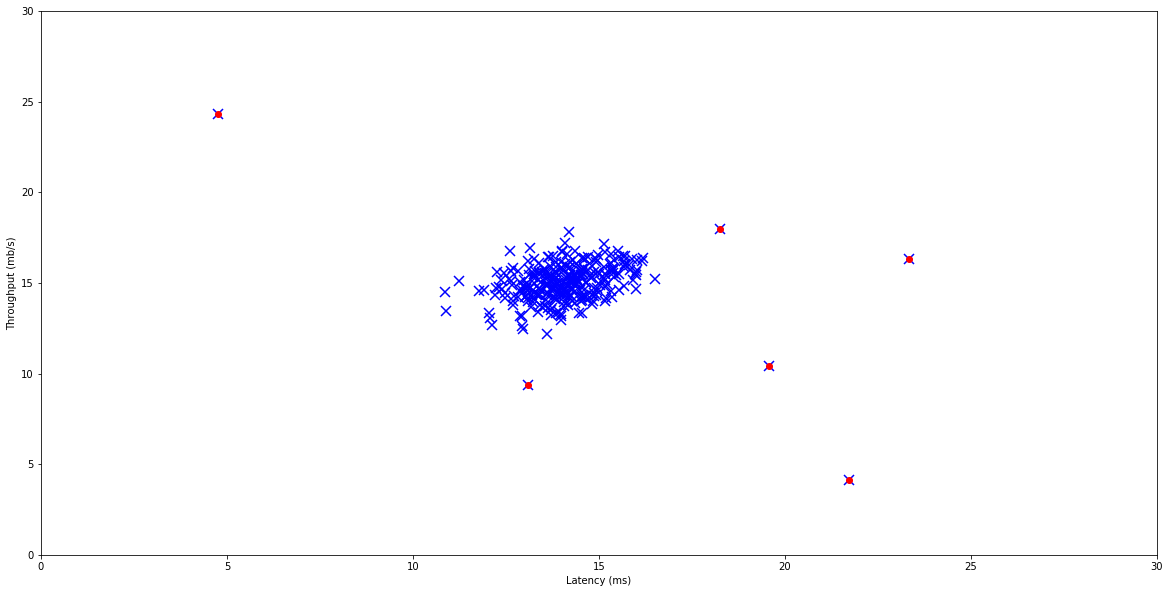

Best epsilon found using cross-validation: 1.3786074982000245e-18
Best F1 on Cross Validation Set: 0.6153846153846154
you should see a value epsilon of about 1.38e-18
you should see a Best F1 value of 0.615385
# Outliers found: 117


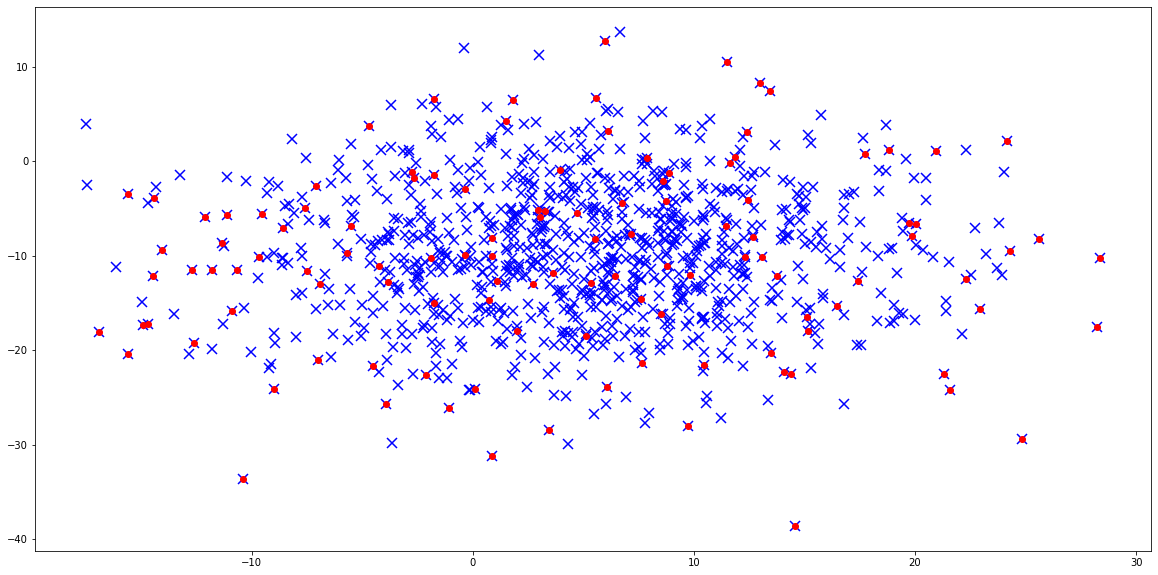

In [2]:
%matplotlib inline
from sklearn import svm
import scipy.io as io
import random
import scipy.optimize as op
from mpl_toolkits import mplot3d
import scipy.ndimage
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)

def multivariateGaussian(X, mu, Sigma2):
    k = mu.shape[0]
    if Sigma2.ndim == 1:
        Sigma2 = np.diag(Sigma2)
    X = X-mu
    p =(2*np.pi)**(-k/2)* np.linalg.det(Sigma2)**(-0.5)*np.exp(-0.5 * np.sum(X.dot(np.linalg.pinv(Sigma2))*X, axis=1))
    return p

def selectThreshold(yval, pval):
    bestEpsilon = 0
    bestF1 = 0
    stepsize = (np.max(pval) - np.min(pval))/1000
    for epsilon in np.linspace(np.min(pval),np.max(pval),1000):
        predictions = ((pval<epsilon)*1).reshape(-1,1)
        tp = np.sum((predictions==1)&(yval==1))
        fp = np.sum((predictions==1)&(yval==0))
        fn = np.sum((predictions==0)&(yval==1))
        pred=tp/(fp+tp)
        rec=tp/(fn+tp)
        F1=(2*pred*rec)/(pred+rec)
        if F1 > bestF1:
            bestF1 = F1
            bestEpsilon = epsilon
    return bestEpsilon, bestF1

mat = io.loadmat('ex8data1.mat')
X=mat['X']
Xval=mat['Xval']
yval=mat['yval']
[m,n]=X.shape

plt.plot(X[:, 0], X[:, 1], 'bx', ms=10, mew=1.5)
plt.axis(np.array([0,30,0,30]))
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

mu=np.sum(X,0).T/m
sigma2=np.sum((X-mu.T)**2, 0)/m
p = multivariateGaussian(X, mu, sigma2)

pval = multivariateGaussian(Xval, mu, sigma2)
[epsilon, F1] = selectThreshold(yval, pval)
print('Best epsilon found using cross-validation:', epsilon)
print('Best F1 on Cross Validation Set:', F1)
print('(you should see a value epsilon of about 8.99e-05)')
print('(you should see a Best F1 value of  0.875000)\n')

outliers = np.where(p < epsilon)
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', ms=6)
plt.show()

mat = io.loadmat('ex8data2.mat')
X=mat['X']
Xval=mat['Xval']
yval=mat['yval']
[m,n]=X.shape
mu=np.sum(X,0).T/m
sigma2=np.sum((X-mu.T)**2, 0)/m
p = multivariateGaussian(X, mu, sigma2)
pval = multivariateGaussian(Xval, mu, sigma2)
[epsilon, F1] = selectThreshold(yval, pval)

print('Best epsilon found using cross-validation:', epsilon)
print('Best F1 on Cross Validation Set:', F1)
print('you should see a value epsilon of about 1.38e-18')
print('you should see a Best F1 value of 0.615385')
print('# Outliers found:', np.sum(p<epsilon))

plt.plot(X[:, 0], X[:, 1], 'bx', ms=10, mew=1.5)
outliers = np.where(p < epsilon)
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', ms=6)
plt.show()